### **Exploratory Data Analytics on the HR Dataset**
Dataset & Description: For this project we am going to use a dataset from Kaggle that has been named ‘HR Analytics Dataset’. Here is the link to that dataset should it be needed, https://www.kaggle.com/code/paramarthasengupta/hr-analytics-prediction-why-do-people-resign/notebook. The dataset consists of comprehensive information pertaining to employees within a company, encompassing a diverse array of attributes crucial for understanding workforce dynamics. With a total of 35 columns, the dataset covers key aspects such as age, department, job role, and marital status among others. Noteworthy features include daily rate, job satisfaction, and employment tenure, providing insights into various facets of employee engagement and performance. Particularly significant is the inclusion of the target variable "Attrition," which signifies whether an employee has departed from the company, marked by a binary classification of "Yes" or "No." This dataset serves as a valuable resource for analyzing factors influencing employee turnover and devising effective retention strategies within organizational settings.



#### Dataset Variables

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Datasets/HR Analytics Dataset.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


Based on this we could see that the dataset contains both numerical variables, representing measurable quantities, and categorical variables, representing categories or groups.

#### Dataset Distributions

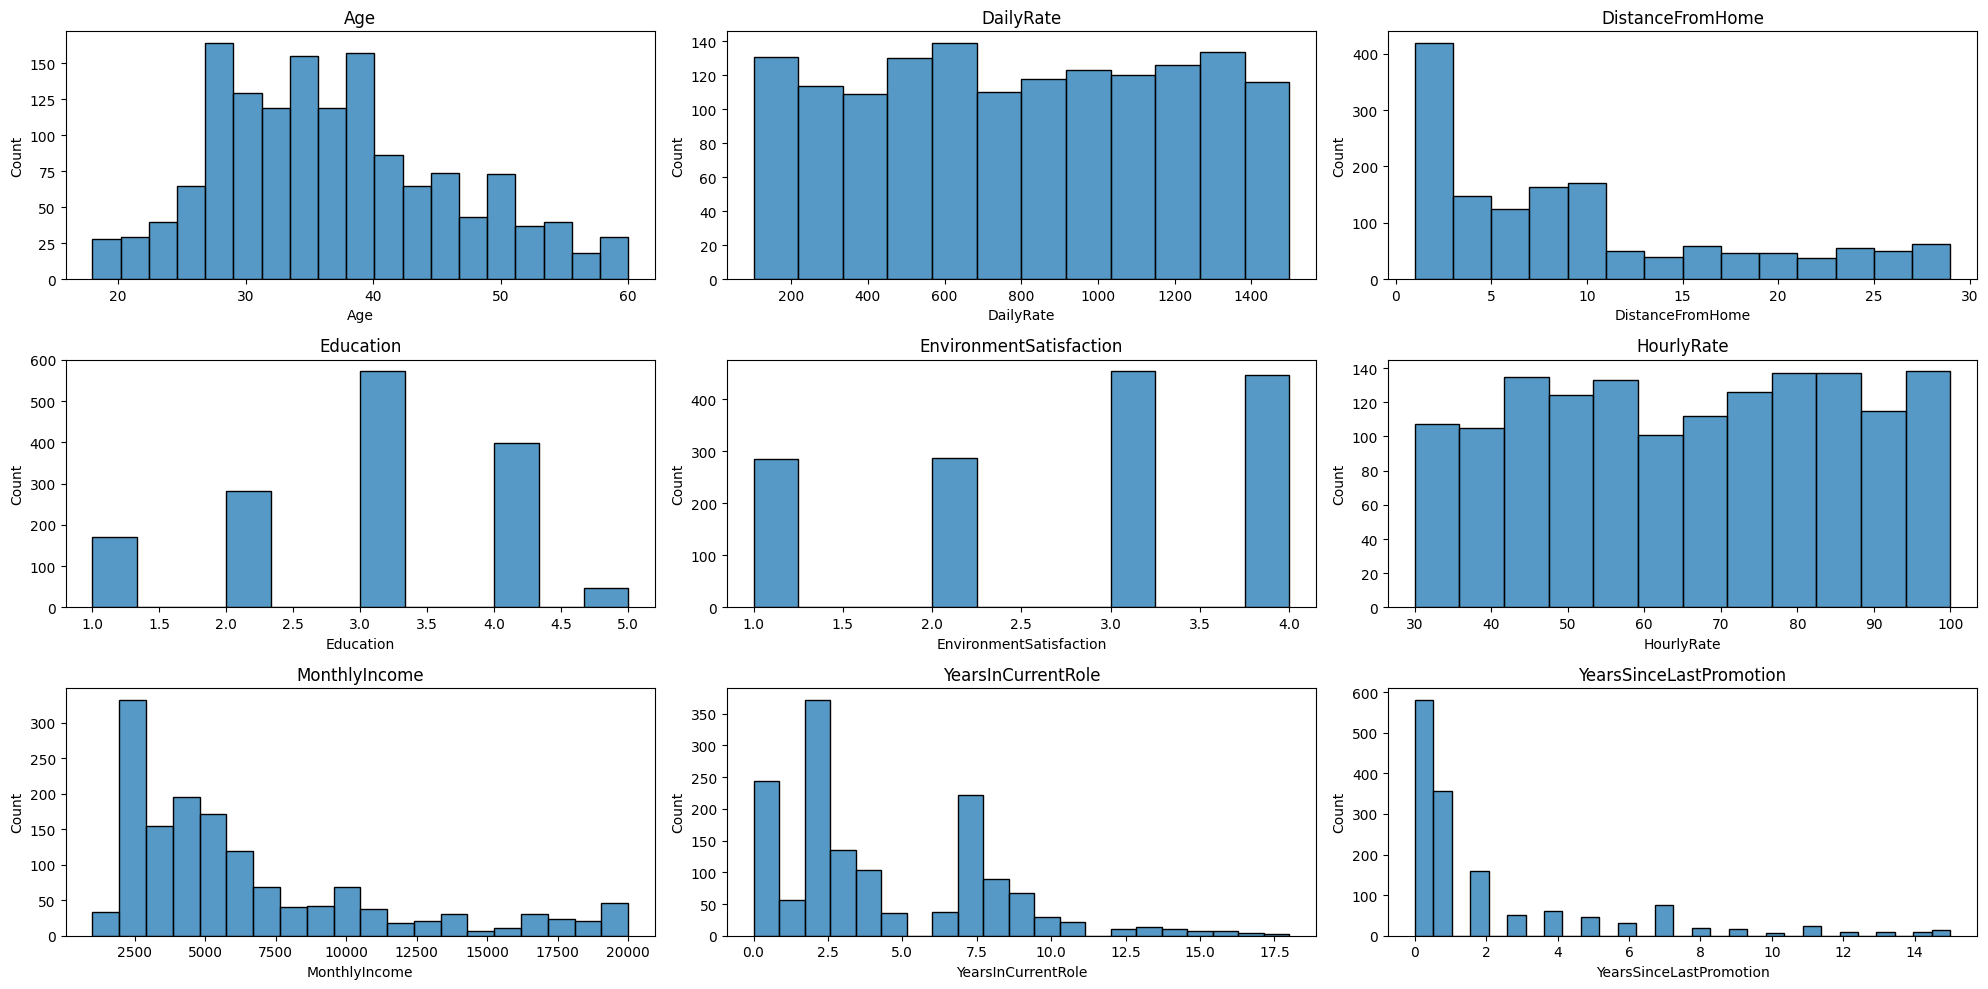

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create 2 different types of data
numerical_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        numerical_columns.append(col)
    else:
        categorical_columns.append(col)

numerical_data = data[numerical_columns]
categorical_data = data[categorical_columns]


# Specify the numerical columns you want to plot
numerical_columns_to_plot = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'MonthlyIncome', 'YearsInCurrentRole', 'YearsSinceLastPromotion',]

# Calculate the number of rows and columns needed for subplots
num_numerical_to_plot = len(numerical_columns_to_plot)
num_cols = 3  # Number of columns for subplots
num_rows = (num_numerical_to_plot + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Plot histograms for selected numerical variables
for i, col in enumerate(numerical_columns_to_plot):
    sns.histplot(data[col], ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_title(col)

# Ensure the remaining axes are empty
for i in range(num_numerical_to_plot, num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

plt.tight_layout()
plt.show()

Based on the graphs of the distribution for part of the features in our numerical data we could say that the distributions vary based on feature. "Age" and "Education" have a unimodal and symmertric distibution whereas, ""Daily Rate", and "Hourly Rate" have symmetric ditributions. We can also say that "Years in Current Role" has a bimodal ditribution, which shows that in this dataset at 2.5 and at 7.5 years people tend to have their peak time in their roles. Lastly, we see that there is a skewed right ditribution of the "Distance from Home", "Monthly Income" and "Years Since Last Promotion" features. This means that majority of the people used in this dataset mostly have minimal travel, an income of $2,500-$7,500 a month and have had under 2 years since their last promotion.

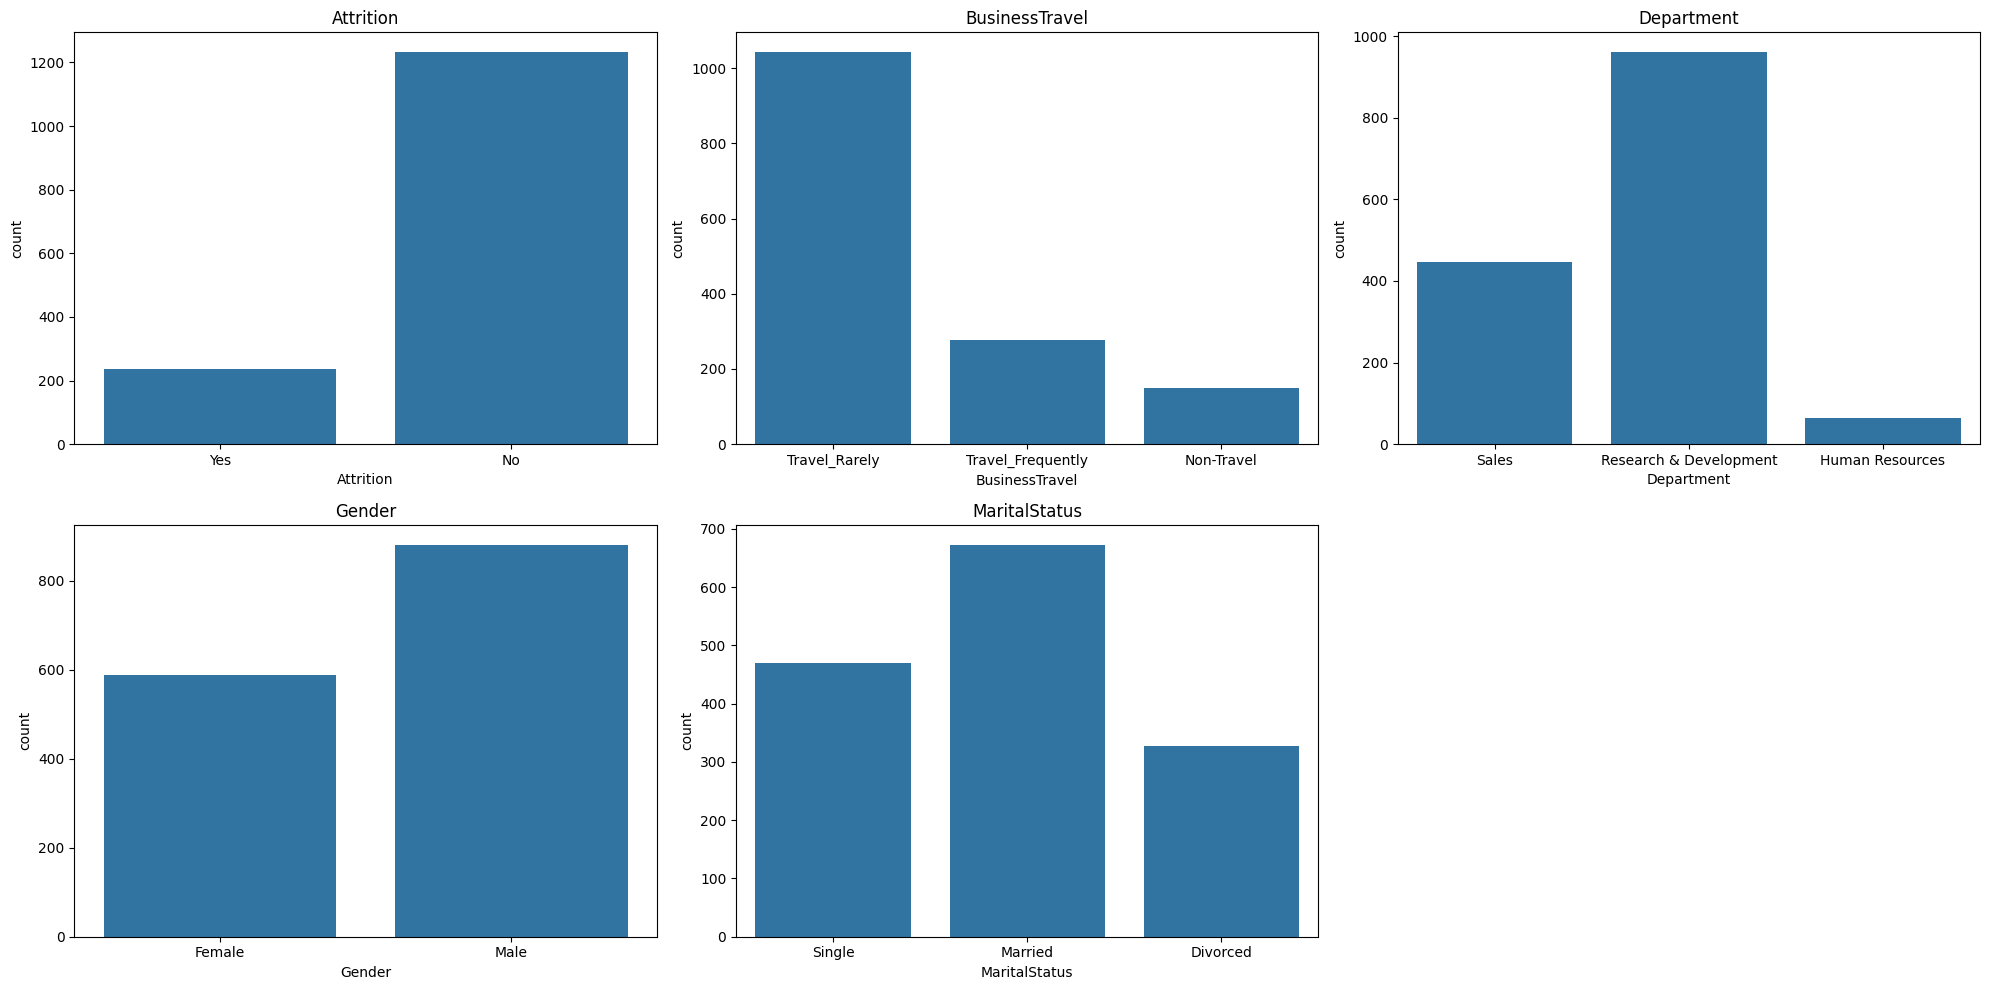

In [6]:
# Specify the categorical columns you want to plot
categorical_columns_to_plot = ['Attrition', 'BusinessTravel', 'Department', 'Gender', 'MaritalStatus']

# Calculate the number of rows and columns needed for subplots
num_categorical_to_plot = len(categorical_columns_to_plot)
num_cols = 3  # Number of columns for subplots
num_rows = (num_categorical_to_plot + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Plot bar plots for selected categorical variables
for i, col in enumerate(categorical_columns_to_plot):
    sns.countplot(data=data, x=col, ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_title(col)

# Ensure the remaining axes are empty
for i in range(num_categorical_to_plot, num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

plt.tight_layout()
plt.show()

Based on these categorical bar plots we can say that majority of the people in this dataset stayed in their current roles, rarely traveled, worked mostly in the Research & Development departement, are male and married.

#### Are there missing values?

In [7]:
# Check for missing values in the entire dataset
missing_values = data.isnull().any().any()

if missing_values:
    print("The dataset contains missing values.")
else:
    print("The dataset does not contain any missing values.")


The dataset does not contain any missing values.


This code shows us that the dataset does not contain missing values. Yay! :)

#### Are there redundant features?

In [8]:
# Compute the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Print the correlation matrix
print(correlation_matrix)


                               Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014 

Based on the correlation matrix, it appears that there are some features exhibiting high correlation with each other. For instance, the 'TotalWorkingYears' feature shows strong positive correlation with 'JobLevel' (0.782), 'MonthlyIncome' (0.773), 'YearsAtCompany' (0.628), 'YearsInCurrentRole' (0.460), and 'YearsWithCurrManager' (0.459). Similarly, 'JobLevel' is highly correlated with 'MonthlyIncome' (0.950) and 'TotalWorkingYears' (0.782). These high correlations suggest redundancy or multicollinearity among these features, implying that including all of them in a predictive model might not provide additional useful information.

Additionally, there are some features with notably weak correlations, such as 'StandardHours', 'EmployeeCount', and 'EmployeeNumber', which show NaN correlations with most other features. These features might not provide significant predictive power and could potentially be candidates for removal from the dataset.

It's important to carefully assess the relationships between these highly correlated features before making any decisions regarding feature selection or model building, as multicollinearity can impact the stability and interpretability of the model.

#### Feature Relationships

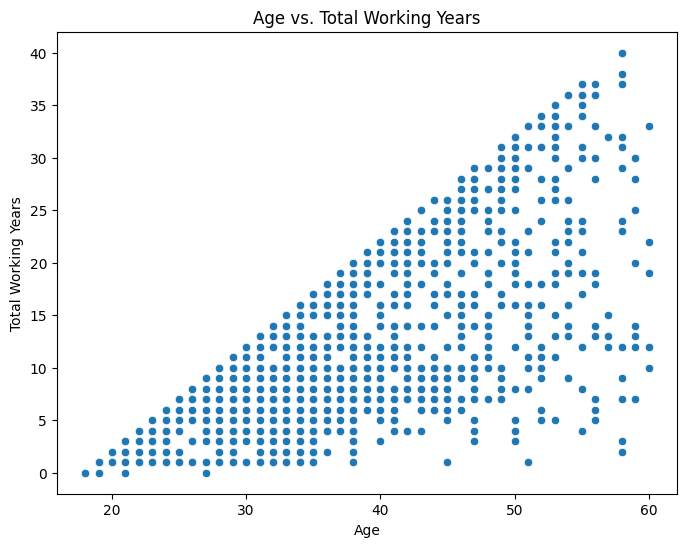

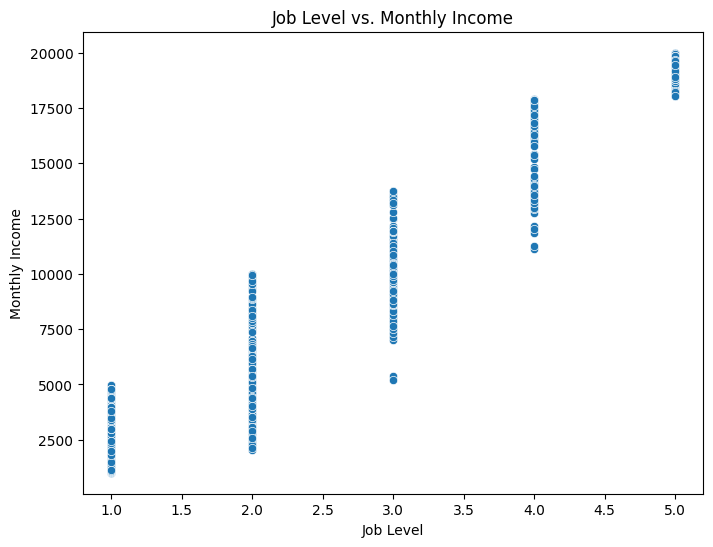

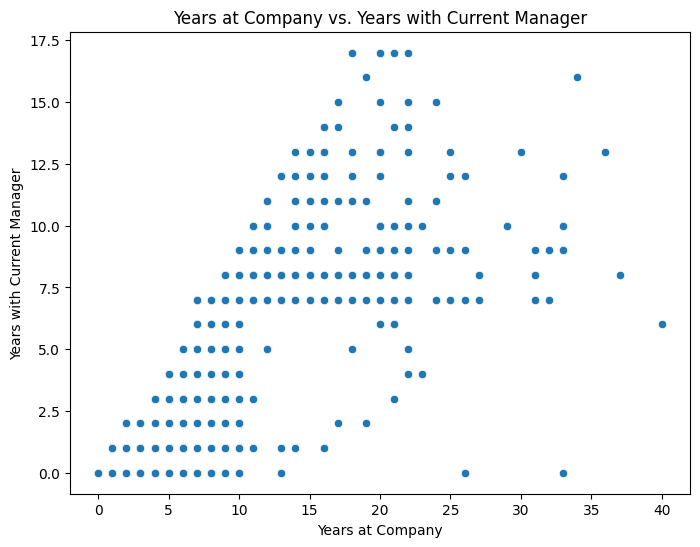

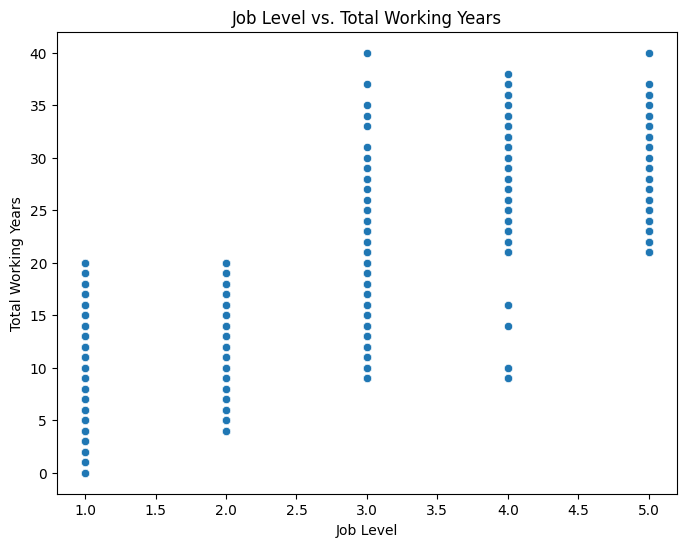

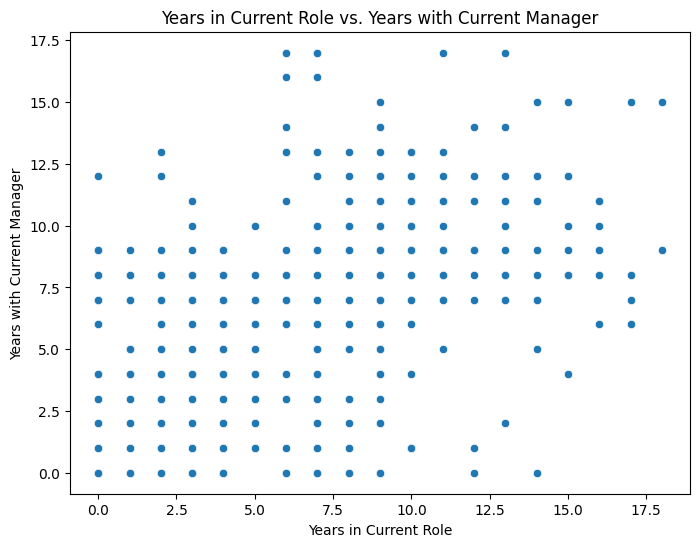

In [9]:
# Scatterplot of Age vs. Total Working Years
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='TotalWorkingYears', data=data)
plt.title('Age vs. Total Working Years')
plt.xlabel('Age')
plt.ylabel('Total Working Years')
plt.show()

# Scatterplot of Job Level vs. Monthly Income
plt.figure(figsize=(8, 6))
sns.scatterplot(x='JobLevel', y='MonthlyIncome', data=data)
plt.title('Job Level vs. Monthly Income')
plt.xlabel('Job Level')
plt.ylabel('Monthly Income')
plt.show()

# Scatterplot of Years at Company vs. Years with Current Manager
plt.figure(figsize=(8, 6))
sns.scatterplot(x='YearsAtCompany', y='YearsWithCurrManager', data=data)
plt.title('Years at Company vs. Years with Current Manager')
plt.xlabel('Years at Company')
plt.ylabel('Years with Current Manager')
plt.show()


# Scatterplot of Job Level vs. Total Working Years
plt.figure(figsize=(8, 6))
sns.scatterplot(x='JobLevel', y='TotalWorkingYears', data=data)
plt.title('Job Level vs. Total Working Years')
plt.xlabel('Job Level')
plt.ylabel('Total Working Years')
plt.show()

# Scatterplot of Years in Current Role vs. Years with Current Manager
plt.figure(figsize=(8, 6))
sns.scatterplot(x='YearsInCurrentRole', y='YearsWithCurrManager', data=data)
plt.title('Years in Current Role vs. Years with Current Manager')
plt.xlabel('Years in Current Role')
plt.ylabel('Years with Current Manager')
plt.show()



The scatter plots reveal distinct patterns of correlation between various pairs of features. Age and Total Working Years exhibit an upward trend, indicating a positive correlation. Job Level and Monthly Income demonstrate an interesting relationship because the job level is really categorical data... I do not know if it is correct to say this, but it seems to have a positive relationship, with higher job levels corresponding to higher incomes. Similarly, Years at Company and Years with Current Manager show a positive correlation, with an increase in one variable associated with an increase in the other. Job Level and Total Working Years also display a positive correlation, with higher job levels typically corresponding to more years of work. As for Years in Current Role and Year with Current Manager, there does seem to be positive relationship, but I am not sure how strong. Overall, these visualizations provide insights into the relationships between key features in the dataset, offering valuable information for understanding employee demographics and career progression within the company.

#### Are there outliers?

In [10]:
# Define a function to detect potential outliers for each feature
def detect_outliers(data, feature):
    # Calculate the first quartile (Q1)
    Q1 = data[feature].quantile(0.25)
    # Calculate the third quartile (Q3)
    Q3 = data[feature].quantile(0.75)
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Determine the potential outliers
    potential_outliers = data[(data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR))]

    # Return the potential outliers
    return potential_outliers

# List of features to check for outliers
features_to_check = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber',
                     'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                     'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
                     'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
                     'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
                     'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Dictionary to store the count of potential outliers for each feature
outliers_count = {}
no_outliers = []

# Iterate through each feature and check for potential outliers
for feature in features_to_check:
    potential_outliers = detect_outliers(data, feature)
    if not potential_outliers.empty:
        outliers_count[feature] = len(potential_outliers)
    else:
        no_outliers.append(feature)

# Print the count of potential outliers for each feature
for feature, count in outliers_count.items():
    print(f"Potential outliers for {feature}: {count}")

# Print features with no outliers
print("\nFeatures with no outliers:")
for feature in no_outliers:
    print(feature)


Potential outliers for MonthlyIncome: 114
Potential outliers for NumCompaniesWorked: 52
Potential outliers for PerformanceRating: 226
Potential outliers for StockOptionLevel: 85
Potential outliers for TotalWorkingYears: 63
Potential outliers for TrainingTimesLastYear: 238
Potential outliers for YearsAtCompany: 104
Potential outliers for YearsInCurrentRole: 21
Potential outliers for YearsSinceLastPromotion: 107
Potential outliers for YearsWithCurrManager: 14

Features with no outliers:
Age
DailyRate
DistanceFromHome
Education
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
HourlyRate
JobInvolvement
JobLevel
JobSatisfaction
MonthlyRate
PercentSalaryHike
RelationshipSatisfaction
StandardHours
WorkLifeBalance


Here we can see that there are potential outliers for several fields. This can also mean that there is a smaller linear relationship for these features, as outliers can skew the distribution and affect the calculation of statistical measures such as mean and standard deviation. Additionally, the presence of outliers may indicate variability or unusual patterns in the data, which could be caused by factors such as measurement errors, data entry mistakes, or genuine anomalies in the underlying process being studied. Therefore, it's important to carefully investigate the nature of these potential outliers to determine whether they represent true anomalies or artifacts in the data collection process.

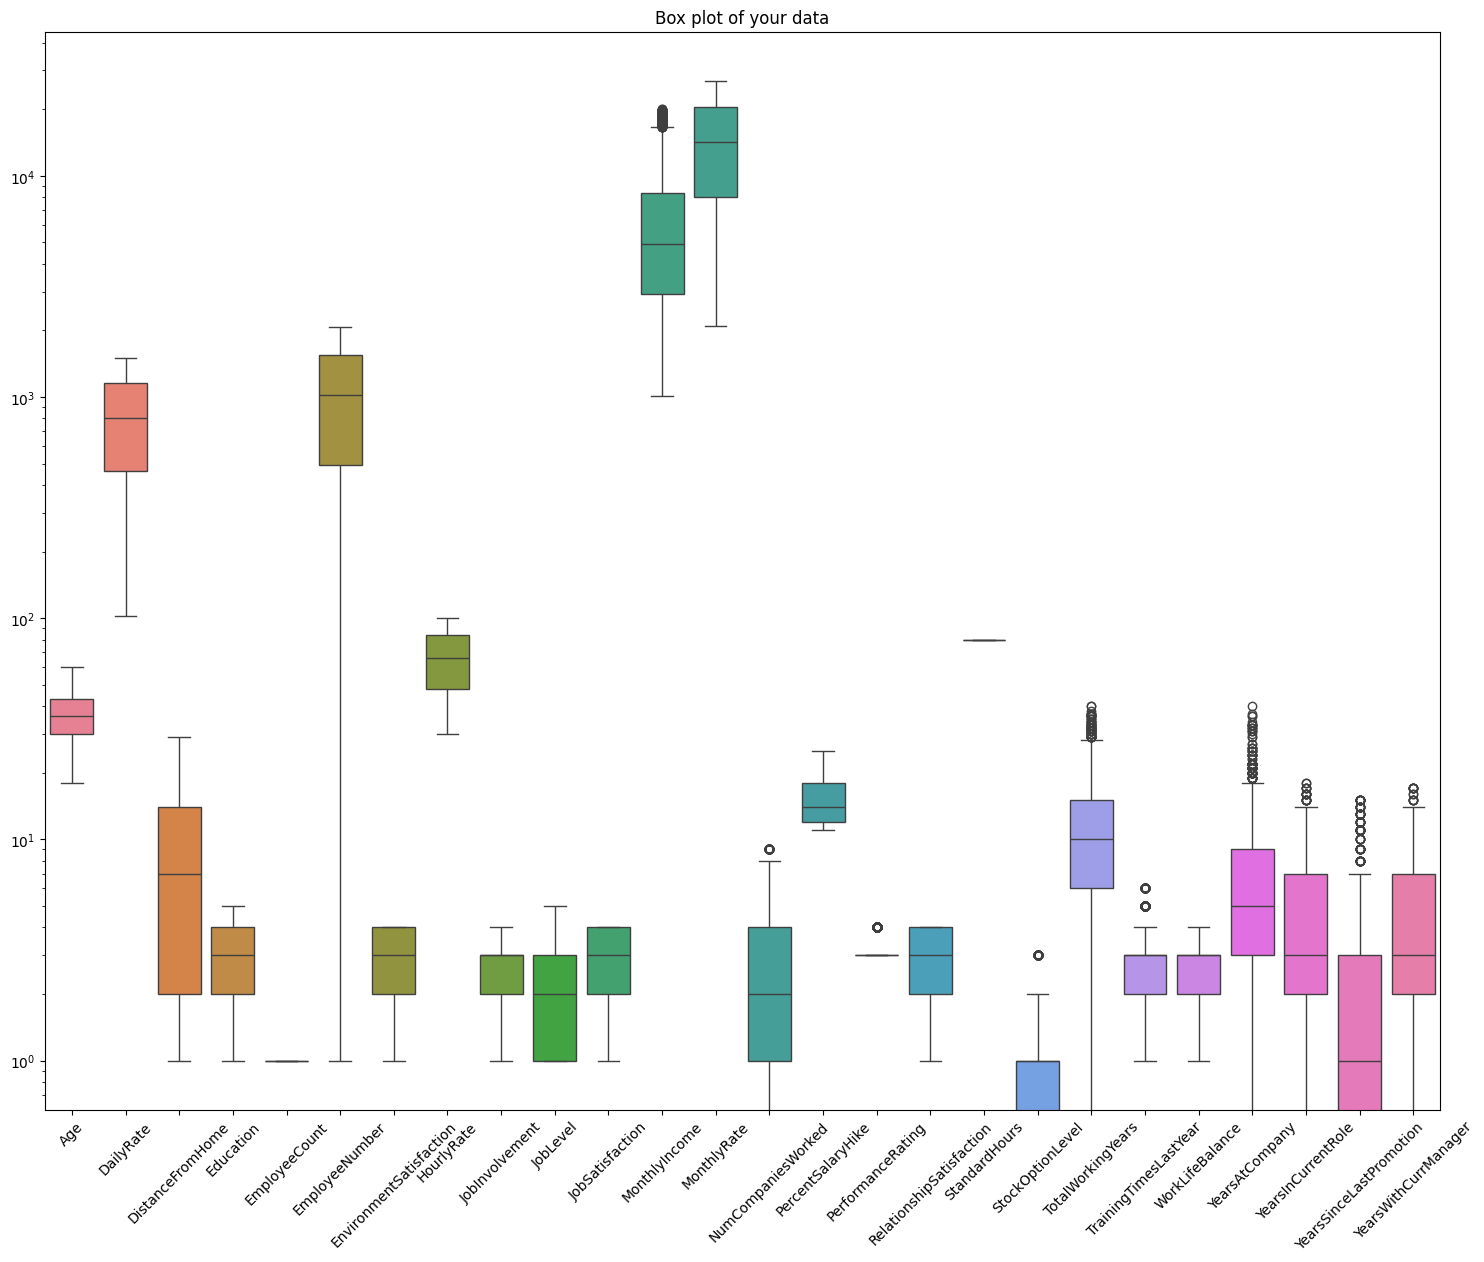

In [11]:
# Box plot with logarithmic scale for y-axis
plt.figure(figsize=(18, 14))
sns.boxplot(data=data)
plt.title("Box plot of your data")
plt.xticks(rotation=45)

# Set the y-axis to logarithmic scale
plt.yscale('log')

plt.show()

These box plots provide a concise visualization of the distribution and spread of data within different features or variables. The box portion of the plot represents the interquartile range (IQR), which spans from the first quartile (25th percentile) to the third quartile (75th percentile). The line within the box denotes the median (50th percentile) of the data.

Outliers are observations that fall significantly beyond the whiskers of the box plot, typically defined as points that lie outside the range of
Q1 − 1.5 × IQR to Q3 + 1.5 × IQR, where Q1 and Q3 are the first and third quartiles, respectively. These points represent extreme values that deviate from the majority of the data and may indicate unusual or erroneous measurements.

In box plots here, outliers are visually represented as individual points beyond the whiskers. Identifying outliers using box plots involves assessing data points that fall outside the expected range based on the IQR. These points are often flagged for further investigation to determine whether they result from genuine variability in the data or potential errors or anomalies in measurement.

By examining box plots, we can quickly identify features with significant outliers, enabling them to better understand the distributional characteristics of the data and make informed decisions about data preprocessing, modeling, or analysis strategies.

#### Feature Correlations

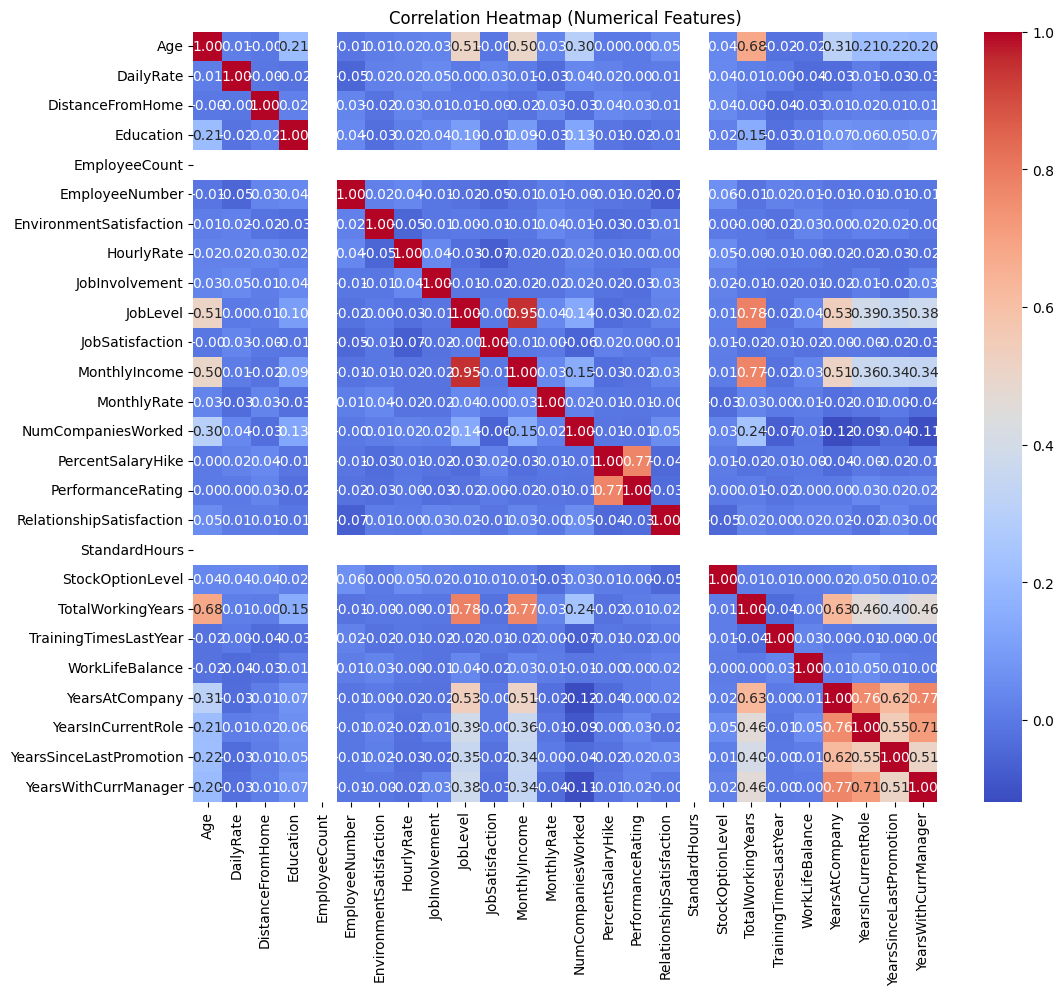

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns
numerical_data = data.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()


In [13]:
# Specific  pairs of features for which to compute correlations
feature_pairs = [
    ('Age', 'TotalWorkingYears'),
    ('JobLevel', 'MonthlyIncome'),
    ('YearsAtCompany', 'YearsWithCurrManager'),
    ('JobLevel', 'TotalWorkingYears'),
    ('YearsInCurrentRole', 'YearsWithCurrManager'),
]

# Compute the correlation coefficient for each pair of features
correlation_results = []
for feature1, feature2 in feature_pairs:
    correlation_coefficient = data[feature1].corr(data[feature2])
    correlation_results.append((feature1, feature2, correlation_coefficient))

# Display the correlation results
for feature1, feature2, correlation_coefficient in correlation_results:
    print(f"Correlation between {feature1} and {feature2}: {correlation_coefficient:.2f}")

Correlation between Age and TotalWorkingYears: 0.68
Correlation between JobLevel and MonthlyIncome: 0.95
Correlation between YearsAtCompany and YearsWithCurrManager: 0.77
Correlation between JobLevel and TotalWorkingYears: 0.78
Correlation between YearsInCurrentRole and YearsWithCurrManager: 0.71


The correlation coefficients provide quantitative measures of the relationships between different pairs of features within the dataset. Upon examining the correlation matrix, several noteworthy correlations become apparent. For instance, there is a strong positive correlation of approximately 0.68 between age and total working years, indicating that as employees age, they tend to accumulate more years of work experience. Similarly, there is a substantial positive correlation of approximately 0.95 between job level and monthly income, suggesting that higher job levels are associated with higher monthly incomes. Additionally, a positive correlation of about 0.77 exists between total working years and monthly income, indicating that employees with more years of experience generally earn higher incomes. These correlations align with intuitive expectations about the relationships between age, job level, total working years, and income in the context of employment. However, it's essential to interpret these correlations cautiously and consider other factors that may influence these relationships within the specific organizational context.

#### Relationship between feature and the target

<ipython-input-14-42f4fb892c0e>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  feature_counts = data.groupby([feature, 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')


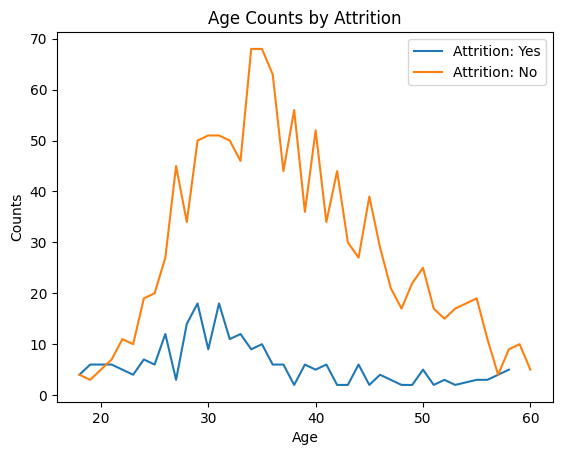

<ipython-input-14-42f4fb892c0e>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  feature_counts = data.groupby([feature, 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')


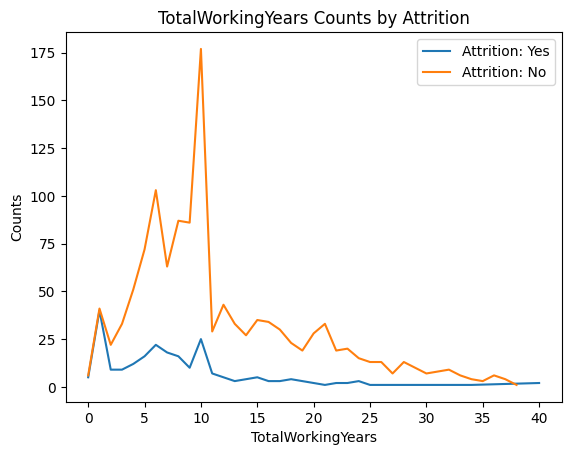

<ipython-input-14-42f4fb892c0e>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  feature_counts = data.groupby([feature, 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')


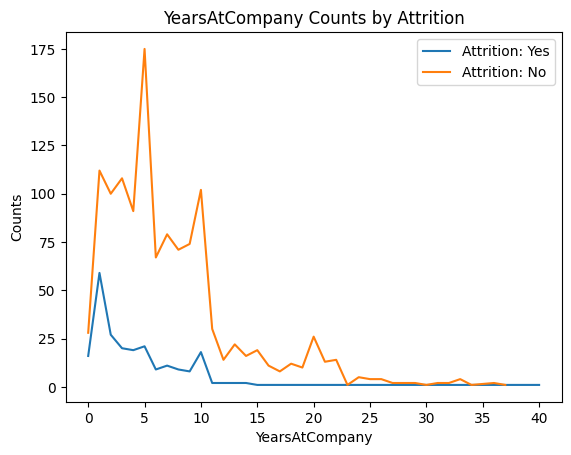

<ipython-input-14-42f4fb892c0e>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  feature_counts = data.groupby([feature, 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')


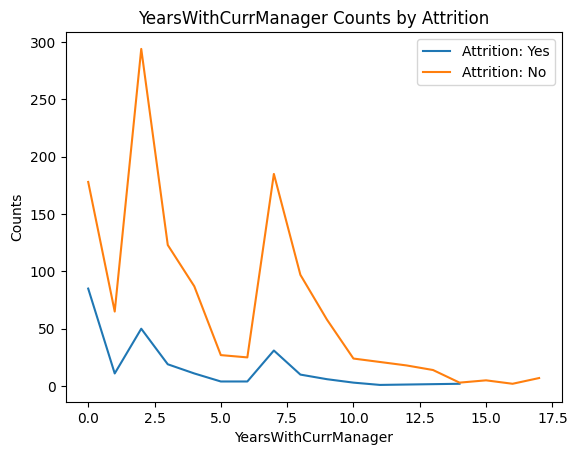

<ipython-input-14-42f4fb892c0e>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  feature_counts = data.groupby([feature, 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')


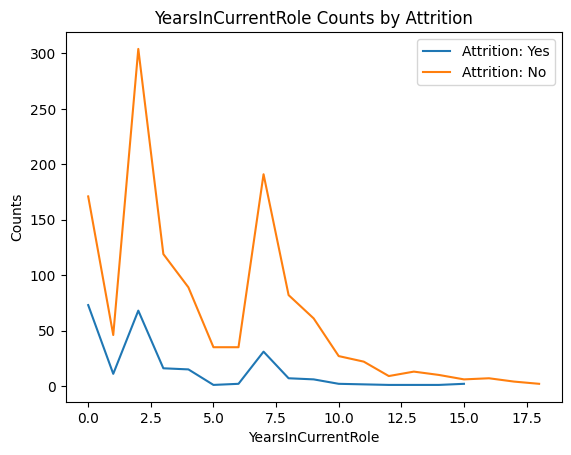

In [14]:
# Define a function to create line plots for each feature
def plot_feature(data, feature):
    # Group data by the feature and Attrition, count the occurrences, and reset index
    feature_counts = data.groupby([feature, 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

    # Create separate plots for Attrition = Yes and Attrition = No
    for attrition_status in ['Yes', 'No']:
        # Filter data for the current attrition status
        attrition_data = feature_counts[feature_counts['Attrition'] == attrition_status]

        # Plot the line graph
        plt.plot(attrition_data[feature], attrition_data['Counts'], label=f'Attrition: {attrition_status}')

    # Add title and labels
    plt.title(f'{feature} Counts by Attrition')
    plt.xlabel(feature)
    plt.ylabel('Counts')
    plt.legend()
    plt.show()

# Example usage for each of the specified features
features_to_plot = ['Age','TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager', 'YearsInCurrentRole']

for feature in features_to_plot:
    plot_feature(data, feature)

Here we observe pivotal junctures at approximately 2.5 and 7.5 years, where individuals tend to decide whether to remain in their current position or seek new opportunities. This trend is evident when analyzing data related to current role and manager tenure. Additionally, even loyal employees exhibit a propensity for turnover every five years, barring exceptional job satisfaction, as indicated by a further decline at the 10-year mark and beyond. Notably, the average tenure of a loyal employee hovers around 10 years, as illustrated by the line graph depicting total years worked. The dataset's peak age falls within the 30-35 range, suggesting that employees in this age group prioritize stability and are more inclined to stay in their current roles.

#### Hypothesis Confirmation
Based on the analysis conducted, it appears that the hypothesis regarding employee turnover prediction has been confirmed to some extent. Through various visualizations and exploratory data analysis techniques, we were able to identify key factors associated with employee attrition, such as age, job level, total working years, and tenure in current role. The correlations and patterns observed in the data suggest that certain demographics and employment characteristics are indeed linked to the likelihood of employees leaving the company. However, further validation through predictive modeling and evaluation of model performance metrics would be necessary to fully confirm the hypothesis and assess the predictive power of the identified factors.